In [1]:
!pip install langchain langgraph  langsmith langchain_groq langchain_community

  Using cached langchain-0.3.25-py3-none-any.whl.metadata (7.8 kB)
  Using cached langchain_text_splitters-0.3.8-py3-none-any.whl.metadata (1.9 kB)
Using cached langchain-0.3.25-py3-none-any.whl (1.0 MB)
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ------------ --------------------------- 0.8/2.5 MB 5.6 MB/s eta 0:00:01
   ----------------------------- ---------- 1.8/2.5 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 3.9 MB/s eta 0:00:00
Using cached langchain_text_splitters-0.3.8-py3-none-any.whl (32 kB)


In [2]:
groq_api_key = "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"

In [3]:
from langchain_groq import ChatGroq

In [4]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-it")

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END 

In [8]:
class State(TypedDict):
    messages: Annotated[list,add_messages]
graph_builder= StateGraph(State)

In [9]:
graph_builder

In [10]:
def chatbot(state: State):
    return{"messages":llm.invoke(state["messages"])}

In [12]:
graph_builder.add_node("chatbot",chatbot)

In [13]:
graph_builder

In [14]:
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_edge('chatbot', END)

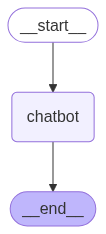

In [15]:
graph_builder.compile()

In [16]:
graph = graph_builder.compile()

In [17]:
while True:
    user_input = input("user: ")
    if user_input.lower() in [ "quit",'q']:
        print("Good Bye,thank you LangGraph Framework")
        break
    for event in graph.stream({'messages':('user', user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print('Assistant:',value['messages'].content)

dict_values([{'messages': AIMessage(content="The market for Generative AI is booming and is expected to grow exponentially in the coming years. \n\nHere's a breakdown of the market:\n\n**What is it?**\n\nGenerative AI refers to artificial intelligence models trained to create new content, such as text, images, audio, video, and code. This differs from other AI types that focus on analyzing existing data.\n\n**Key Players:**\n\n* **Large Tech Companies:** Google (Bard, Imagen), Microsoft (GitHub Copilot, DALL-E 2), Meta (Make-A-Video), OpenAI (ChatGPT, DALL-E 2), Amazon (SageMaker)\n* **AI Startups:** Stability AI, Midjourney, Anthropic, Jasper.ai\n* **Specialized Companies:** RunwayML (video generation), Synthesia (synthetic media)\n\n**Market Segments:**\n\n* **Text Generation:**\n\nChatbots, content creation (articles, marketing copy, scripts), code generation, summarization, translation.\n\n* **Image Generation:**\n\nArt and design, advertising, product visualization, photo editing,